# Lab 4-0: kNN With and Without Code

## Background on kNN

kNN is a **non-parametric, lazy** learning algorithm and is one of the simplest **supervised learning** algorithms based on **feature similarity**.

It's considered *lazy* because it doesn't use the *training data* points to do any *generalization* and has no explicit training phase at all. In fact, it usually keeps (uses) all the training data.

It is considered *non-parametric* because it doesn't have explicit *model parameters*; instead, each training instance is a model parameter and so the kNN algorithm does not make any assumptions about the underlying data distribution. Therefore, the number of model parameters actually grows with the training set (**parametric models** are assumed to have an underlying probability distribution, like a *normal distribution*, with a *fixed number* of
parameters). The `k` in kNN is actually a **hyperparameter** and the kNN model structure itself is determined from the data.

kNN is a **supervised learning** algorithm that requires labelled samples. It can be used for **classification** (is this A or is this B?), where an unknown sample is classified by a *majority vote*. It can also be used for **regression**, where it uses the *average value* of its k-nearest neighbours to predict a continuous number as the value for the unknown sample.

Once this is done, we can do **feature selection** to see if all of our features are truly informative.


# Part 1: kNN without code

## Playing kNN Cards

Suppose you were playing a card game and you couldn't determine whether an Ace is a face card or not. You know it's usually considered to have a value of either 1 or 11. Would a value of 1 make it a face card? How about if it was an 11? Let's explore a way to classify it definitively as a face card or not!


**QUESTION 1**: As a first step in feature selection, do you think the suit of a card helps determine whether it is a face card?

**ANSWER**:  No, because the only things the suit tells us is if its a spade,club,heart,and diamond and there is an equal number of face cards for each suit.


## Setup

We'll start by having you deal out a random sample of 20 cards (remember to discard any Aces, though). You might end up with a list as below; this one was derived from [Random Card Playing Site](https://www.random.org/playing-cards/) but you can also create your own using actual physical cards:

```
Jack of Clubs
Five of Diamonds
Three of Hearts
Four of Hearts
Nine of Spades
Queen of Diamonds
Two of Spades
Six of Spades
King of Clubs
Five of Clubs
Seven of Diamonds
Four of Clubs
Two of Diamonds
Six of Diamonds
Two of Clubs
Seven of Clubs
King of Hearts
Ten of Hearts
Jack of Hearts
Five of Hearts
```

We can start to look at both the value of the cards (the cardinal value) as well as the suit, which we'll represent by the nominal value of 1 (Spades), 2 (Diamonds), 3 (Clubs), and 4 (Hearts).

## Side Note

**Cardinal** numbers **c**ount how many items you have, like 1, 2, 3, 4, etc.

**Ordinal** numbers tell you the **o**rder or position of something in a list, like 1st, 2nd, 3rd, etc.

**Interval variables** are similar to ordinal variables but where we know both the order and the exact differences between the values, like temperatures or times.

Finally, **Nominal** numbers are **n**ames for some categories or quantities, like players' numbers or suits of cards; nominal variables are also sometimes called **categorical variables**.

We can now represent our random cards dataset as the following table:


| Card Drawn | Suit | Value | Face Card? |
|------------|------|-------|------------|
| Jc         | 3    | 11    | y          |
| 5d         | 2    | 5     | n          |
| 3h         | 4    | 3     | n          |
| 4h         | 4    | 4     | n          |
| 9s         | 1    | 9     | n          |
| Qd         | 2    | 12    | y          |
| 2s         | 1    | 2     | n          |
| 6s         | 1    | 6     | n          |
| Kc         | 3    | 13    | y          |
| 5c         | 3    | 5     | n          |
| 7d         | 2    | 7     | n          |
| 4c         | 3    | 4     | n          |
| 2d         | 2    | 2     | n          |
| 6d         | 2    | 6     | n          |
| 2c         | 3    | 2     | n          |
| 7c         | 3    | 7     | n          |
| Kh         | 4    | 13    | y          |
| 10h        | 4    | 10    | n          |
| Jh         | 4    | 11    | y          |
| 5h         | 4    | 5     | y          |

And here is the key for the suits:

| KEY | SUIT     |
|-----|----------|
| 1   | Spades   |
| 2   | Diamonds |
| 3   | Clubs    |
| 4   | Hearts   |




## Start of Instructions

Let's dive in and start the actual lab.








**QUESTION 2**: Please create a table as above in Excel for the 20 cards you drew and paste that table below:

**ANSWER**:Link to the google sheet in case there is something wrong with the image.


https://docs.google.com/spreadsheets/d/1OTYyV6wS4Rd3ezIthlLo-CAEjwIa49gaKchPlkPRcqA/edit?usp=sharing




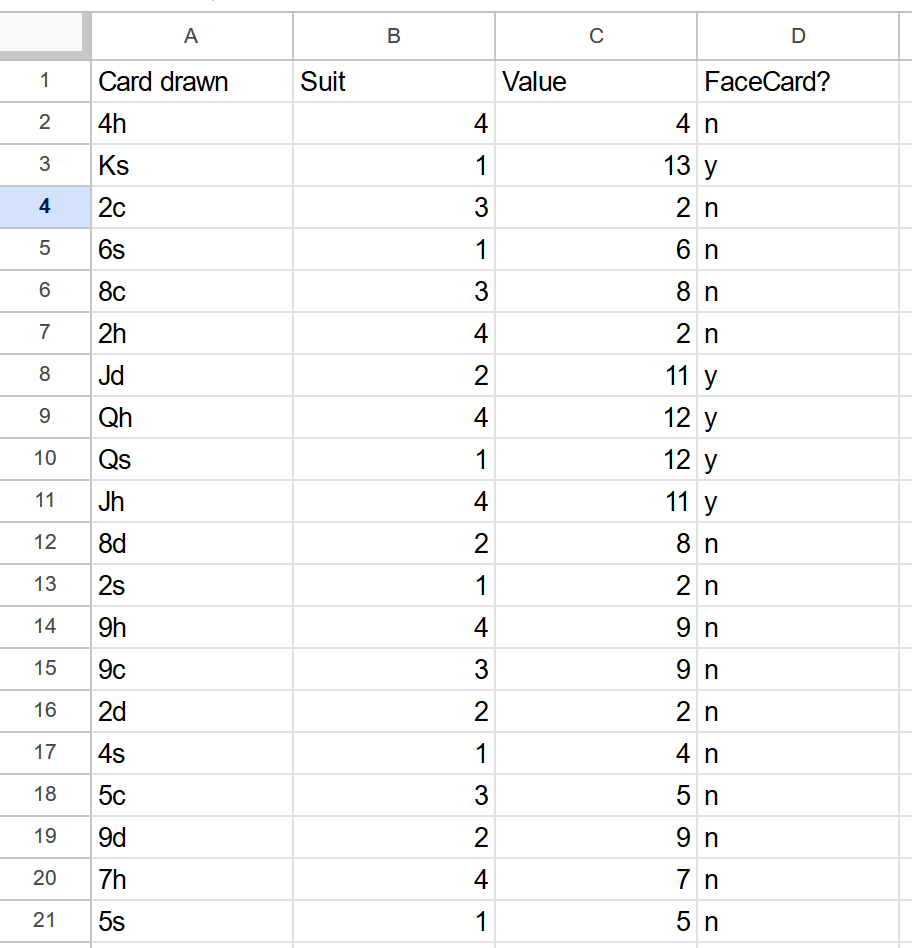

The above table contains the data that will serve as our **training data**. We can graph this data to get an idea of what it looks like. We can create various plots; one of those we'll create is a *Scatter Plot* of the *Suit* column vs the *Value* column as shown below.

**Nota Bene**: you can convert CSV style columns to CSV rows by using this [free online converter](https://onlinecsvtools.com/convert-csv-columns-to-rows). E.g., you can copy a column from Excel and convert it to a comma-separated list so you can use it in the code below to draw the scatter plot as an alternative to the scatter plot in Excel. You can also use pandas to read the Excel file directly and do the conversions automatically, of course!

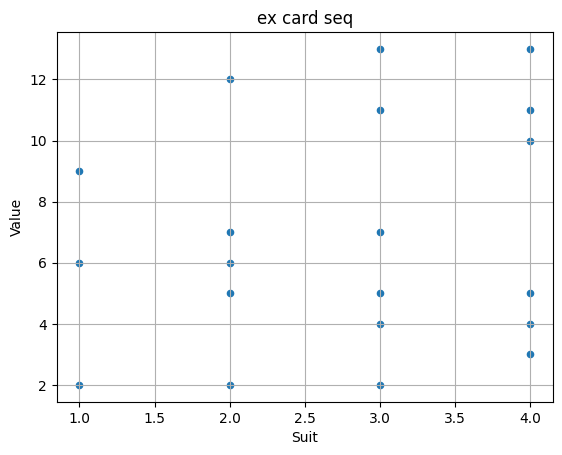

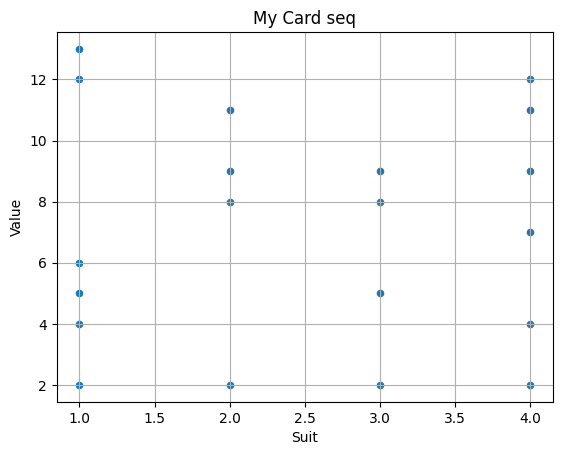

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data in the form of list of tuples
x_suits_ex = [3,2,4,4,1,2,1,1,3,3,2,3,2,2,3,3,4,4,4,4]
y_values_ex = [11,5,3,4,9,12,2,6,13,5,7,4,2,6,2,7,13,10,11,5]

# Create DataFrame using data
df_ex = pd.DataFrame({
    "Suit":x_suits_ex,
    "Value":y_values_ex
})

df_ex.head()

(fig, axes) = plt.subplots()
df_ex.plot(kind='scatter', x='Suit', y='Value', ax=axes,title='ex card seq')

# Turn on the grid
axes.grid()

####

x_suits=[4,1,3,1,3,4,2,4,1,4,2,1,4,3,2,1,3,2,4,1]
y_suits=[4, 13, 2, 6, 8, 2, 11, 12, 12, 11, 8, 2, 9, 9, 2, 4, 5, 9, 7, 5]
df=pd.DataFrame({
    "Suit":x_suits,
    "Value":y_suits
})
df.head()

(fig, axes) = plt.subplots()
df.plot(kind='scatter', x='Suit', y='Value', ax=axes,title='My Card seq')

# Turn on the grid
axes.grid()

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**QUESTION 3**: Please plot the Suit vs Value columns as a scatter plot (either using Excel or Python) and paste that below:

**ANSWER**:
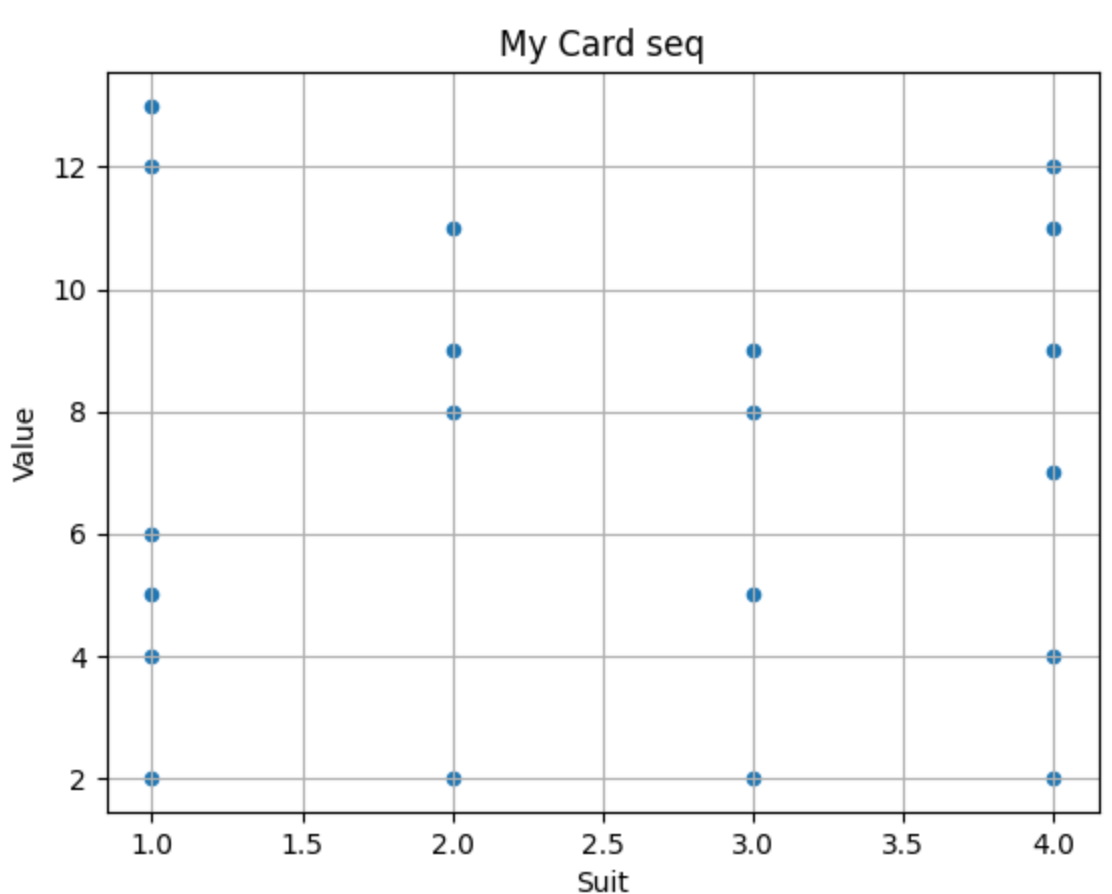

## The Algorithmic Solution

Now we'll need to generate our test sample, the one we want to classify. We'll pick two scenarios: one where an Ace is worth 1 and another where the Ace is worth 11. We'll run the following algorithm for **each of those two scenarios**; i.e., you'll first run the algorithm for an Ace having the value 11 and then run it for an Ace having the value 1.

We also need to decide what the suit of the Ace will be. In order to decide the suit, please pick another random card from the deck and, whatever it's suit, use that as the suit for the Ace for that run through the algorithm.

Let's start our actual solution by outlining the algorithm to do the kNN classification. You can do all of this by hand or in Excel only (but, of course, you can also use a high-level programming language like Python, as well).

1.  Select the value (1 or 11) and suit for an Ace
2.  Select the value of `k`
    1.  How might your answer to this question help you avoid ties in         the last step?
3.  For each of the 20 training data samples above, let\'s do the following:
    1.  Calculate the Standardized Euclidean Distance (see below) between the Value<sub>Ace</sub> and the Value<sub>Sample</sub>
    2.  Calculate the Hamming Distance (see below) between the Suit<sub>Ace</sub> and the Suit<sub>Sample</sub>
    3.  Add the two distances
4.  Put the `k` points with the smallest distances into a new set, `S`
5.  Get the majority label of the elements in S and set this as the Face Card Label for the Ace

Repeat this for the other value of the Ace.

### Example

So, for example, if the Ace is set to 1, you might end up with a table that looks something like the following:

| Card Drawn | Suit | Value | Face Card? | Ace | Suit | Value | Euclidean Distance | Hamming Distance | Sum of Distances |
|------------|------|-------|------------|-----|------|-------|--------------------|------------------|------------------|
| Jd         | 2    | 11    | y          | Ah  | 4    | 1     | 10                 | 1                | 11               |
| 7c         | 3    | 7     | n          | Ah  | 4    | 1     | 6                  | 1                | 7                |
| Js         | 1    | 11    | y          | Ah  | 4    | 1     | 10                 | 1                | 11               |
| 8d         | 2    | 8     | n          | Ah  | 4    | 1     | 7                  | 1                | 8                |

Then, you'd just get the majority vote for the `Face Card?` value of the `k` samples with the smallest distances and use that as the classification of `Face Card?` for your Ace with a value of 1. You'd of course repeat this for Ace with a value of 11.

**QUESTION 4**: Did these results make sense? Why or why not?

**ANSWER**: Yes theese results make sense, the euclidean distance is essentially telling how similar or different the sample is compared with the ground truth. THe hammming distance is to mesaure if its the same suite and when we combine it

**QUESTION 5**: How do you think this might change if you change the value of k? Is there some value of k you think is optimal? Why or why not?

**ANSWER**:By changing the value of k we are essentially changing how sensitive the model is. If we have k at a lower value the model will be very sesntive however if there is an outlier or noise in our data the model preforamce will be affected.However as K increases its more robust to noise however the model accuracy might not be great. If there were to be some optimial value of k in this case I feel like it would be 3,5,7 because its not to little so its suseptible to noise, and not to big that the model wont be accurate. You also want it to be a odd number so there is a definite solution if its even you will run into problems.However you would have to play around to find an optimal value.

## Computing the Distances

We could compute the distance between the values column pretty easily; e.g., we could use the Euclidean distances. But how do we compute "distances" between spades and hearts? Is the distance between spades and hearts larger than the "distance" between spades and diamonds? Does that make any sense?

There are many approaches we can take with these categorical features: if the categorical variable is a **one-hot feature**, we normally use the **Hammond Distance**. If the categorical feature represents things like ratings which have bins (a rating of 3 stars or 5 stars, e.g.), we could still use a Euclidean Distance.

The inclusion of categorical features is as simple as defining a distance measure for that feature. If it is a categorical one-hot feature, we could use the Hammond distance. If it is a categorical variable with **bins** (like ratings), we might still want to use the Euclidean Distance, with perhaps assigning a **weight** to the different variables to account for their different value ranges. If a categorical variable is a **binary** variable (e.g., whether a person is a citizen or not), we can use either, perhaps accounting for the weights of the variables.

In our present case, we can utilize the Hamming Distance for the suit values. Because we use the Hamming Distance here and it can have a value of only 0 or 1, it doesn't make sense to compare it to a Euclidean Distance on the value column as those differences would overwhelm a maximum value of 1 for the categorical variable, the suit. In fact, if there were other features/variables with different ranges of values, we'd have to *assign weights* to them to make sure they're counted fairly. Alternatively, we can also **standardize** the value variable's distance first.

We can standardize by **normalizing** a set of numbers so that each number is between 0.0 and 1.0. To do this, we can take each number in turn and subtract from it the minimum (observed or known) value. We can then divide this result by the (observed or known) range of values taken by that variable.


## Distance Function Formulae

Euclidean Distance and its cousins:
* Euclidean: $ d\left( p,q\right)   = \sqrt {\sum _{i=1}^{n}  \left( q_{i}-p_{i}\right)^2 } $

* Manhattan: $ d\left( p,q\right)   =  {\sum _{i=1}^{n}  | q_{i}-p_{i} | } $

* Minkowski: $ d\left( p,q\right)   = \Bigg( {\sum _{i=1}^{n}  \left( | q_{i}-p_{i} | \right)^q } \Bigg)^{1/q} $


Hamming Distance:
$ D_H  =  {\sum _{i=1}^{n}  | q_{i}-p_{i} | } $ where $q \ne p \Rightarrow D_H = 1$ and $q = p \Rightarrow D_H = 0$

Standardized Distance: Standardized variable, $X$:
$ X_s = \frac{X - Min}{Max - Min} $

Standardized Euclidean Distance:
A normalized vector is usually $\frac{v}{||v||}$ where the magnitude of $v$, $||v||$, is $v \cdot v$. Here, we can standardize the euclidean distance by first calculating the distance, $X$, and then standardizing by just subtracting the min value, $Min = 1$, and then dividing by the range of values, $Max - Min = 13 - 1$.

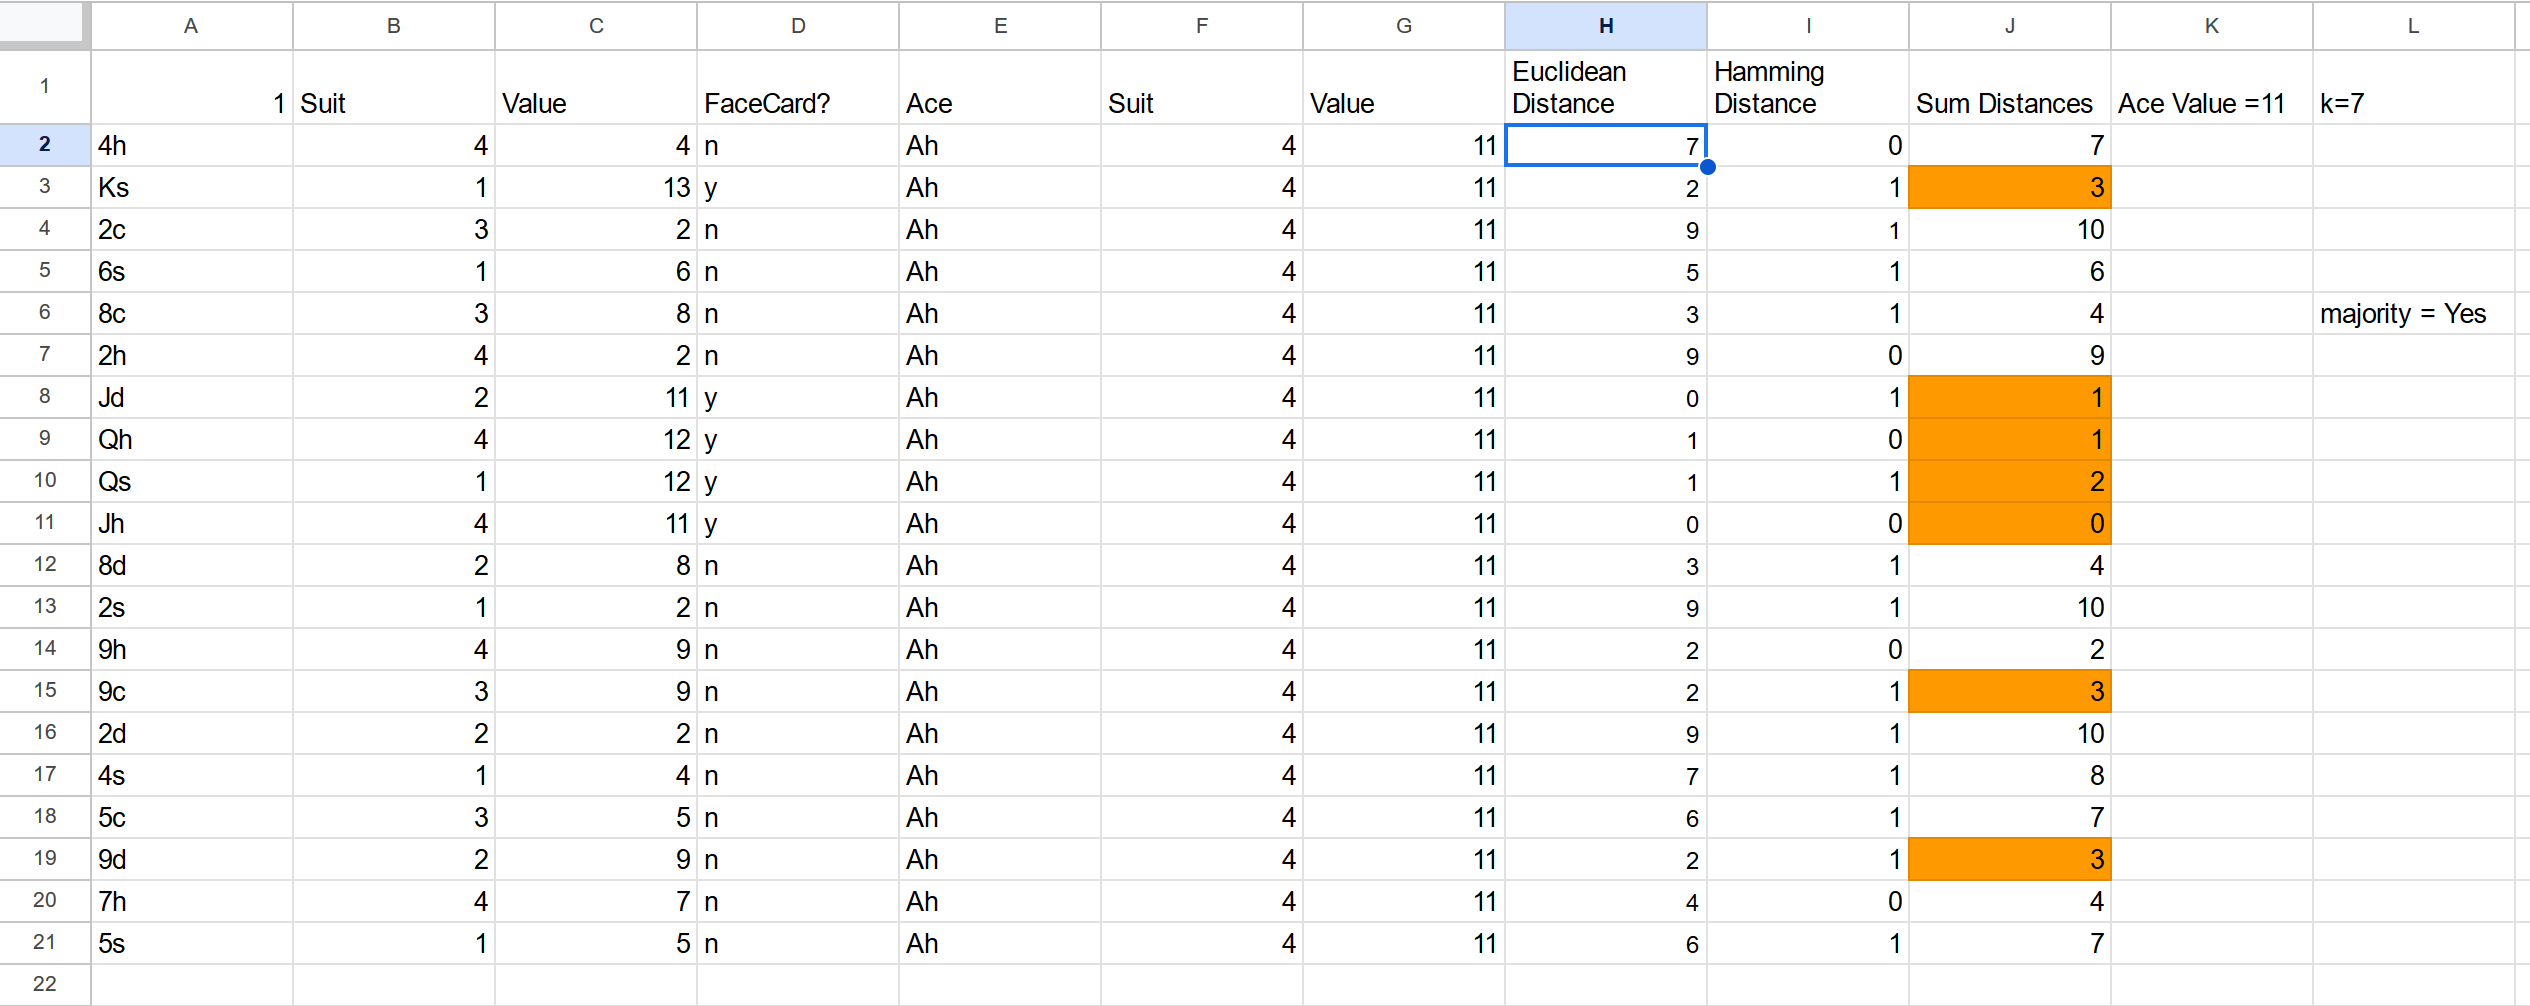

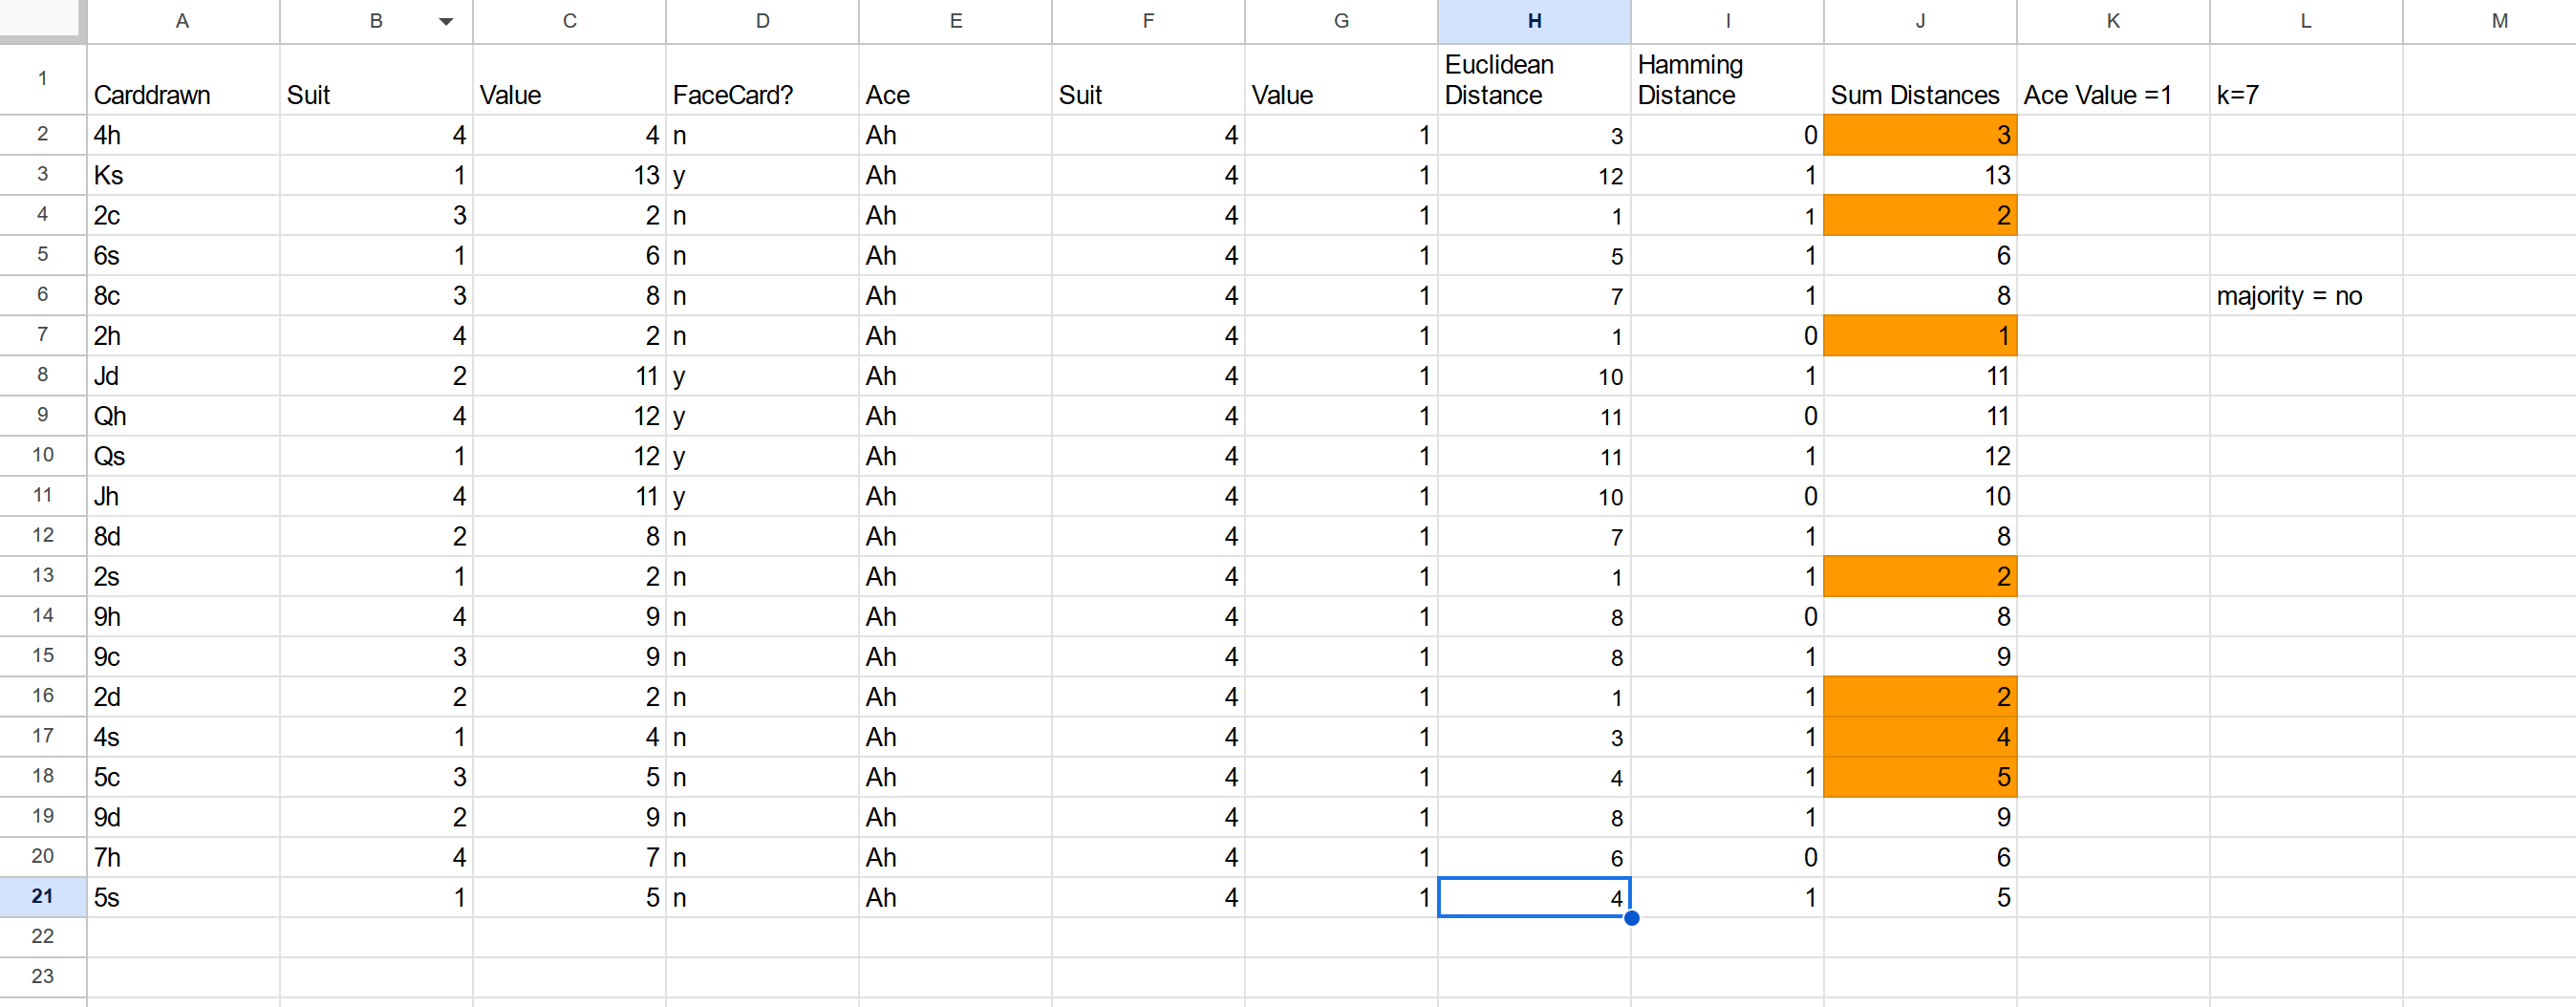

# Part 2: kNN from Scratch

## kNN Overview
The **k-Nearest Neighbors** (**kNN**) algorithm is an example of **supervised learning** and is one of the easiest algorithms to understand and implement.

![](https://miro.medium.com/max/1400/1*5AMECj--BWqx2GtKmZwKLQ.png)

The model for kNN is the entire training dataset. When a prediction is required for an unseen data instance, the kNN algorithm will search through the training dataset for the _k_ most-similar-instances. The prediction attribute of the most similar instances is then summarized and returned as the prediction for the unseen instance.

The metric or distance measure or similarity measure is dependent on the type of data. For numeric, real-valued data, the Euclidean distance is a very convenient metric whereas for categorical or binary data, a metric like the Hamming distance might be more appropriate.

In the case of regression problems, the average of the predicted attribute may be returned. In the case of classification, the most prevalent class may be returned.

## kNN Implementation

We will start our exploration of the Iris dataset, one of the most widely used datasets in machine learning, and try to classify new samples. We'll thus implement kNN from scratch and use it on the Iris dataset.

How does k-Nearest Neighbors Work
---------------------------------

The kNN algorithm belongs to the family of _instance-based_, _competitive learning_, and _lazy learning_ algorithms.

_Instance-based_ algorithms are those algorithms that model the problem using data instances (or rows) in order to make predictive decisions. The kNN algorithm is an extreme form of instance-based methods because all training observations are retained as part of the model.

It is a _competitive learning_ algorithm, because it internally uses competition between model elements (data instances) in order to make a predictive decision. The objective similarity measure between data instances causes each data instance to compete be most similar to a given unseen data instance (to "win") and contribute to a prediction.

_Lazy learning_ refers to the fact that the algorithm does not build a model until the time that a prediction is required. It is lazy because it only does work at the last second. This has the benefit of only including data relevant to the unseen data, called a _localized model_. A disadvantage is that it can be computationally expensive to repeat the same or similar searches over larger training datasets (this was one of the drawbacks that led us to create the Adjusted Cosine Similarity approach).

Finally, kNN is powerful because it does not assume anything about the data, other than the fact that a distance measure can be calculated consistently between any two instances. As such, it is called _non-parametric_ or non-linear as it does not assume a functional form.

Iris Classification Problem
---------------------------

The IRIS dataset ([https://en.wikipedia.org/wiki/Iris\_flower\_data\_set](https://en.wikipedia.org/wiki/Iris_flower_data_set)) consists of information on 150 different Iris flowers. Each of these flowers belongs to one of three species of Irises (Iris Setosa, Iris Virginica, and Iris Versicolor). Each row in the dataset consists of information about one Iris flower and measures the following 4 items on a numeric scale and 1 item that is the Iris Species Label:
1.  Sepal length
2.  Sepal width
3.  Petal length
4.  Petal width
5.  Iris Species Label

Each row thus also has a label for that individual flower that determines which species it belongs to (i.e., I. setosa, I. virginica, or I. versicolor).

Thus, there are 4 measurements of given flowers: sepal length, sepal width, petal length, and petal width, all in the same unit of centimeters. The predicted attribute is the species, which can be one of three values: setosa, versicolor, or virginica.

The Iris dataset is **downloadable** from [iris.data](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) and is a standard dataset where the species attribute is known for all instances in the dataset. We can thus split the data into training and testing datasets and use the results to evaluate our algorithm implementation. Good classification accuracy on this problem is above 90% correct, typically 96% or better.

How to implement k-Nearest Neighbors in Python
----------------------------------------------

This lab is broken down into the following steps:

1.  **Data Munging**: Open and process the dataset from CSV files and split the dataset into training/testing datasets.
2.  **Similarity Computation**: Calculate the distance between two data instances.
3.  **Locate Neighbors**: Locate the _k_ most similar data instances.
4.  **Generate Response**: Generate a response from a set of data instances.
5.  **Calculate Accuracy**: Summarize the accuracy of predictions.



### 1\. Data Munging

#### Preliminaries

The first thing we need to do is load and process our data file. The data is in CSV format without a header line or any quotes. We can open the file with the open function and read the data lines using the reader function in the [csv](https://docs.python.org/2/library/csv.html) module.

In [ ]:
import csv
with open('iris.data', 'rt') as csvfile:
    lines = csv.reader(csvfile)
    for row in lines:
        print (', '.join(row))

5.1, 3.5, 1.4, 0.2, Iris-setosa
4.9, 3.0, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.3, 0.2, Iris-setosa
4.6, 3.1, 1.5, 0.2, Iris-setosa
5.0, 3.6, 1.4, 0.2, Iris-setosa
5.4, 3.9, 1.7, 0.4, Iris-setosa
4.6, 3.4, 1.4, 0.3, Iris-setosa
5.0, 3.4, 1.5, 0.2, Iris-setosa
4.4, 2.9, 1.4, 0.2, Iris-setosa
4.9, 3.1, 1.5, 0.1, Iris-setosa
5.4, 3.7, 1.5, 0.2, Iris-setosa
4.8, 3.4, 1.6, 0.2, Iris-setosa
4.8, 3.0, 1.4, 0.1, Iris-setosa
4.3, 3.0, 1.1, 0.1, Iris-setosa
5.8, 4.0, 1.2, 0.2, Iris-setosa
5.7, 4.4, 1.5, 0.4, Iris-setosa
5.4, 3.9, 1.3, 0.4, Iris-setosa
5.1, 3.5, 1.4, 0.3, Iris-setosa
5.7, 3.8, 1.7, 0.3, Iris-setosa
5.1, 3.8, 1.5, 0.3, Iris-setosa
5.4, 3.4, 1.7, 0.2, Iris-setosa
5.1, 3.7, 1.5, 0.4, Iris-setosa
4.6, 3.6, 1.0, 0.2, Iris-setosa
5.1, 3.3, 1.7, 0.5, Iris-setosa
4.8, 3.4, 1.9, 0.2, Iris-setosa
5.0, 3.0, 1.6, 0.2, Iris-setosa
5.0, 3.4, 1.6, 0.4, Iris-setosa
5.2, 3.5, 1.5, 0.2, Iris-setosa
5.2, 3.4, 1.4, 0.2, Iris-setosa
4.7, 3.2, 1.6, 0.2, Iris-setosa
4.8, 3.1, 1.6, 0.2, Iris-setosa
5.4, 3.4

If you get an `"iterator should return strings, not bytes"` error, please change `'rb'` to `'rt'`. This is just a test fragment which we're using for unit testing but we'll incorporate it into your module or function below and generalize it to either use a local data file or download file from the web.

#### Starting our solution

Next, we need to split the data into a **training** dataset that kNN can use to make predictions and a **testing** dataset that we can use to evaluate the accuracy of the model.

We first need to convert the flower measures that were loaded as strings into numbers that we can work with. Next, we need to split the data set randomly into training and testing datasets. A ratio of 67/33 for training/testing is a standard ratio that's often used.

Pulling it all together, we can define a function called **loadDataset** that loads a CSV file with the provided filename and splits it randomly into training and testing datasets using the provided split ratio.

### START BUILDING OUR SOLUTION NOW

In [ ]:
import csv
import random
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    #with open(filename, 'rb') as csvfile:
    with open(filename, 'rt', encoding="utf-8") as csvfile:  # Had issues "iterator should return strings, not bytes"
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

Download the iris flowers dataset as a CSV file to a local directory. We can then test this function out with our iris dataset, as follows:


In [ ]:
trainingSet=[]
testSet=[]
loadDataset('iris.data', 0.66, trainingSet, testSet)
print('Train: ' + repr(len(trainingSet)))
print('Test: ' + repr(len(testSet)))

Train: 99
Test: 51


### 2\. Similarity Computation

In order to make predictions we need to calculate the similarity between any two given data instances. This is needed so that we can locate the _k_ most similar data instances in the training dataset for a given member of the testing dataset and in turn make a prediction.

Given that all four flower measurements are numeric and have the same units, we can directly use the Euclidean distance measure. This is defined as the square root of the sum of the squared differences between the two arrays of numbers:

  
![](http://mines.humanoriented.com/classes/2010/fall/csci568/portfolio_exports/sphilip/images/euclid_eqn.gif)

Additionally, we want to control which fields to include in the distance calculation. Specifically, we only want to include the first 4 attributes. One approach is to limit the euclidean distance to a fixed length, ignoring the final dimension.

Putting all of this together we can define the **euclideanDistance** function as follows:

In [ ]:
import math
def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

We can test this function with some sample data, as follows:

In [48]:
data1 = [2, 2, 2, 'a']
data2 = [4, 4, 4, 'b']
distance = euclideanDistance(data1, data2, 3)
print('Distance: ' + repr(distance))

NameError: name 'euclideanDistance' is not defined

### 3\. Locate Neighbors

Now that we have a similarity measure, we can use it collect the _k_ most similar instances for a given unseen instance. This is a straight forward process of calculating the distance for all instances and selecting a subset with the smallest distance values.

Below is the **getNeighbors** function that returns _k_ most similar neighbors from the training set for a given test instance (using the already defined **euclideanDistance** function):

In [ ]:
import operator
def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

We can test out this function as follows:

In [ ]:
trainSet = [[2, 2, 2, 'a'], [4, 4, 4, 'b']]
testInstance = [5, 5, 5]
k = 1
neighbors = getNeighbors(trainSet, testInstance, 1)
print(neighbors)

NameError: name 'getNeighbors' is not defined

### 4\. Generate Response

Once we have located the most similar neighbors for a test instance, the next task is to devise a predicted response based on those neighbors.

We can do this by allowing each neighbor to vote for their class attribute and take the majority vote as the prediction.

Below is a function for getting the majority voted response from a number of neighbors. It assumes the class is the last attribute for each neighbor.

In [ ]:
import operator
def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

We can test out this function with some test neighbors, as follows:

In [ ]:
neighbors = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
response = getResponse(neighbors)
print(response)

NameError: name 'getResponse' is not defined


This approach returns one response in the case of a draw, but you could handle such cases in a specific way, such as returning no response or selecting an unbiased random response.

### 5\. Calculate Accuracy

We have all of the pieces of the kNN algorithm in place. An important remaining concern is how to evaluate the accuracy of predictions.

An easy way to evaluate the accuracy of the model is to calculate a ratio of the total correct predictions out of all predictions made, called the classification accuracy:

![https://research.sethi.org/ricky/book/images/confusion-table-statistics.png](https://research.sethi.org/ricky/book/images/confusion-table-statistics.png)

Below is the **getAccuracy** function that sums the total correct predictions and returns the accuracy as a percentage of correct classifications:

In [ ]:
def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        #if testSet[x][-1] is predictions[x]:   # "is" checks for object equality only now
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

We can test this function with a test dataset and predictions, as follows:


In [ ]:
testSet = [[1,1,1,'a'], [2,2,2,'a'], [3,3,3,'b']]
predictions = ['a', 'a', 'a']
accuracy = getAccuracy(testSet, predictions)
print(accuracy)

NameError: name 'getAccuracy' is not defined

### Putting it all together...

We now have all the elements of the algorithm and we can tie them together with a main function.

Below is the complete example of implementing the kNN algorithm from scratch in Python:

In [ ]:
# kNN implementation in Python 3
import csv
import random
import math
import operator
import urllib.request

In [ ]:
# Old Way Commented-Out: DO NOT RUN THIS:
def loadDataset(filename, split, trainingSet=[] , testSet=[]):
    with open(filename, 'rb') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
        for x in range(len(dataset)-1):
            for y in range(4):
                dataset[x][y] = float(dataset[x][y])
            if random.random() < split:
                trainingSet.append(dataset[x])
            else:
                testSet.append(dataset[x])

def loadDatasetRemote(url, split, trainingSet=[] , testSet=[]):
    #url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    #request = urllib.request.Request(url)
    response = urllib.request.urlopen(url)
    lines = csv.reader(response.read().decode('utf-8').splitlines())
    #lines = csv.reader(csvresponse)
    dataset = list(lines)
    for x in range(len(dataset)-1):
        for y in range(4):
            dataset[x][y] = float(dataset[x][y])
        if random.random() < split:
            trainingSet.append(dataset[x])
        else:
            testSet.append(dataset[x])

In [ ]:
### FUNCTION GET LINES: Get the files, either directly online or by saving it locally:
def getLines(filename):
    lines =  []
    if (filename.startswith(('http', 'ftp', 'sftp')) ):
        # Skip downloading it and open directly online:
        response = urllib.request.urlopen(filename)
        lines = csv.reader(response.read().decode('utf-8').splitlines())
    else:
        # TutorialsPoint IDE requires 'r', not 'rb'
        with open(filename, 'r') as csvfile:
            # csvreader is an object that is essentially a list of lists
            csvreader = csv.reader(csvfile)
            for line in csvreader:
                lines.append(line)
    return lines

def loadDatasetFinal(filename, split, trainingSet=[] , testSet=[]):
    lines = getLines(filename)
    #for row in lines:
    #    print (', '.join(row))

    dataset = list(lines)
    for x in range(len(dataset)-1):
        for y in range(4):                        # legend = ('Sepal length', 'Sepal width', 'Petal length', 'Petal width')
            dataset[x][y] = float(dataset[x][y])
        if random.random() < split:
            trainingSet.append(dataset[x])
        else:
            testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

def main():
    # set our parameters
    k = 3
    split = 0.67
    filename = 'iris.data'
    filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

    # prepare data
    trainingSet=[]
    testSet=[]
    loadDatasetFinal(filename, split, trainingSet, testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))


    # generate predictions
    predictions=[]
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')

main()

Train set: 98
Test set: 52
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual

Running the example, you will see the results of each prediction compared to the actual class value in the test set. At the end of the run, you will see the accuracy of the model. In this case, a little over 98%:

In [ ]:
...
  > predicted='Iris-virginica', actual='Iris-virginica'
  > predicted='Iris-virginica', actual='Iris-virginica'
  > predicted='Iris-virginica', actual='Iris-virginica'
  > predicted='Iris-virginica', actual='Iris-virginica'
  > predicted='Iris-virginica', actual='Iris-virginica'
  Accuracy: 98.0392156862745%

In [ ]:
### FUNCTION GET LINES: Get the files, either directly online or by saving it locally:
def getLines(filename):
    lines =  []
    if (filename.startswith(('http', 'ftp', 'sftp')) ):
        # Skip downloading it and open directly online:
        response = urllib.request.urlopen(filename)
        lines = csv.reader(response.read().decode('utf-8').splitlines())
    else:
        # TutorialsPoint IDE requires 'r', not 'rb'
        with open(filename, 'r') as csvfile:
            # csvreader is an object that is essentially a list of lists
            csvreader = csv.reader(csvfile)
            for line in csvreader:
                lines.append(line)
    return lines

def loadDatasetFinal(filename, split, trainingSet=[] , testSet=[]):
    lines = getLines(filename)
    #for row in lines:
    #    print (', '.join(row))

    dataset = list(lines)
    for x in range(len(dataset)-1):
        for y in range(4):                        # legend = ('Sepal length', 'Sepal width', 'Petal length', 'Petal width')
            dataset[x][y] = float(dataset[x][y])
        if random.random() < split:
            trainingSet.append(dataset[x])
        else:
            testSet.append(dataset[x])


def euclideanDistance(instance1, instance2, length):
    distance = 0
    for x in range(length):
        distance += pow((instance1[x] - instance2[x]), 2)
    return math.sqrt(distance)

def getNeighbors(trainingSet, testInstance, k):
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = euclideanDistance(testInstance, trainingSet[x], length)
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

def getResponse(neighbors):
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

def getAccuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0


def main():
    # set our parameters
    k = 3
    split = 0.67
    filename = 'iris.data'
    filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

    # prepare data
    trainingSet=[]
    testSet=[]
    loadDatasetFinal(filename, split, trainingSet, testSet)
    print('Train set: ' + repr(len(trainingSet)))
    print('Test set: ' + repr(len(testSet)))


    # generate predictions
    predictions=[]
    for x in range(len(testSet)):
        neighbors = getNeighbors(trainingSet, testSet[x], k)
        result = getResponse(neighbors)
        predictions.append(result)
        print('> predicted=' + repr(result) + ', actual=' + repr(testSet[x][-1]))
    accuracy = getAccuracy(testSet, predictions)
    print('Accuracy: ' + repr(accuracy) + '%')
    return accuracy
main()


def wrapper(numRuns):
  total_acc=0
  for i in range(numRuns-1):
    result = main()
    total_acc=result+total_acc


  return ("Total_average accuracy per"+" "+ repr(numRuns)+" "+"runs" +" "+ repr(total_acc/(numRuns-1)))

wrapper(2)

Train set: 102
Test set: 48
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-setosa', actual='Iris-setosa'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-versicolor', actual='Iris-versicolor'
> predicted='Iris-ve

'Total_average accuracy per 2 runs 97.91666666666666'

### Questions

6.  On different runs, you'll get different percentage values. Can you explain why?
  This is because everytime we run it we randomly split the data so its not the same data going into the training every time and because of this we get different responses.
7.  Can you add a wrapper to this function so that it computes multiple runs (a user-specified value) and computes an _average_ accuracy over the multiple runs rather than a single accuracy?
8.  kNN Extension from Scratch: Please implement (from scratch!) **one** of the following possible extensions to kNN and show its results in comparison to the regular kNN above.
    1.  **Alternative Distance Measure**: _Easy_: Implement an alternative distance measure, such as the Manhattan distance or the vector dot product introduced above, instead of the Euclidean distance measure we used in our implementation. There are many distance measures available, as we've seen, and you can even develop your own domain-specific distance measures if you like.
    2.  **Normalization**: _Easy_: When the units of measure differ between attributes, it is possible for attributes to dominate in their contribution to the distance measure. For these types of problems, you will want to rescale all data attributes into the range 0-1 (i.e., normalization) before calculating similarity. Update the model to support data normalization. Please do feel free to include some of the approaches we've already implemented.
    3.  **Regression**: _Medium_: You could adapt the implementation to work for regression problems (predicting a real-valued attribute) using kNN. The summary of the closest instances could involve taking the mean or the median of the predicted attribute.
    4.  **Distance-Weighted**: _Hard_: Support for distance-weighted contribution of the _k_\-most similar instances to the prediction
    5.  **Tree-Based**: _Hard_: More advanced tree-based data structures for searching for similar instances.



In [90]:
import pandas as pd
import numpy as np
# Load the dataset and split into train and test
df = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
print(df)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=None)
print(train)

     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width          species
96           

In [33]:
###Everything from scratch###
import pandas as pd
import numpy as np
import math
# Load the dataset and split into train and test
df = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])
print(df)
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3, random_state=None)
print(train)

X_train = train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']].values
X_test=test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values

Y_train=train['species'].values
Y_test=test['species'].values

import numpy as np
from collections import Counter

def ManhattanDistance(row_samp1,row_samp2 ):
  distance=0
  for x in range(len(row_samp1)):
    distance = distance+(np.abs(row_samp1[x]- row_samp2[x]))
  return distance

def gatherKNeighbors(train, test, k):
    distances = []
    for i in train:
        dist = ManhattanDistance(test, i)
        distances.append((i, dist))

    distances.sort(key=lambda x: x[1])
    neighbors=distances[:k]
    return neighbors

def vote(neighbors):
    predictions = {}
    for i in neighbors:
        label = i[0]
        if label in predictions:
            predictions[label] += 1
        else:
            predictions[label] = 1

    temp = Counter(predictions)
    temp2 = temp.most_common(1)
    prediction = temp2[0][0]
    return prediction




def my_acc(prediction, test_labels):
  count =0
  for i in range(len(prediction)):
    if prediction[i] == test_labels[i]:
        count +=1
    else:
        count +=0

    acc = count/len(prediction)
  return acc*100
def main():
  k=3

  final_output_prediction = []
  for x in range(len(X_test)):
      predictions = []
      neighbors = gatherKNeighbors(X_train, X_test[x], k)
      for i in neighbors:
          #print(i) ##Debugging print statement
          label=i[0][-1]
          distance = i[1]
          #print("Label"+ " "+repr(label)) ##Debugging print statment
          #print("Distance"+ " "+repr(distance)) ##Debugging print statment
          predictions.append([label,distance])

      #print("Prediction"+ " " + repr(predictions))
      guess = vote(predictions)
      #print("ML Output"+ " "+ repr(guess))
      final_output_prediction.append(guess)
      print('Predicted Value: ' + repr(final_output_prediction))
      print('Actual Value: ' + repr(Y_test[x]))

  ###
  acc=my_acc(final_output_prediction,Y_test)
  print("ML model Accuracy"+ " "+ repr(acc))
  return acc

def wrapper(numRuns):
  total_acc=0
  for i in range(numRuns-1):
    result = main()
    total_acc=result+total_acc


  return ("Total_average accuracy per"+" "+ repr(numRuns)+" "+"runs" +" "+ repr(total_acc/(numRuns-1)))

wrapper(3)




     sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]
     sepal_length  sepal_width  petal_length  petal_width          species
58           

'Total_average accuracy per 3 runs 95.55555555555556'

In [31]:
def colab2pdf():
    ENABLE=True # @param {type:"boolean"}
    if ENABLE:
        import os, datetime, json, locale, pathlib, urllib, requests, werkzeug, nbformat, google, yaml, warnings
        locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')
        NAME = pathlib.Path(werkzeug.utils.secure_filename(urllib.parse.unquote(requests.get(f"http://{os.environ['COLAB_JUPYTER_IP']}:{os.environ['KMP_TARGET_PORT']}/api/sessions").json()[0]["name"])))
        TEMP = pathlib.Path("/content/pdfs") / f"{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}_{NAME.stem}"; TEMP.mkdir(parents=True, exist_ok=True)
        NB = [cell for cell in nbformat.reads(json.dumps(google.colab._message.blocking_request("get_ipynb", timeout_sec=30)["ipynb"]), as_version=4).cells if "--Colab2PDF" not in cell.source]
        warnings.filterwarnings('ignore', category=nbformat.validator.MissingIDFieldWarning)
        with (TEMP / f"{NAME.stem}.ipynb").open("w", encoding="utf-8") as nb_copy: nbformat.write(nbformat.v4.new_notebook(cells=NB or [nbformat.v4.new_code_cell("#")]), nb_copy)
        if not pathlib.Path("/usr/local/bin/quarto").exists():
            !wget -q "https://quarto.org/download/latest/quarto-linux-amd64.deb" -P {TEMP} && dpkg -i {TEMP}/quarto-linux-amd64.deb > /dev/null && quarto install tinytex --update-path --quiet
        with (TEMP / "config.yml").open("w", encoding="utf-8") as file: yaml.dump({'include-in-header': [{"text": r"\usepackage{fvextra}\DefineVerbatimEnvironment{Highlighting}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines,breakanywhere,commandchars=\\\{\}}"}],'include-before-body': [{"text": r"\DefineVerbatimEnvironment{verbatim}{Verbatim}{breaksymbolleft={},showspaces=false,showtabs=false,breaklines}"}]}, file)
        !quarto render {TEMP}/{NAME.stem}.ipynb --metadata-file={TEMP}/config.yml --to pdf -M latex-auto-install -M margin-top=1in -M margin-bottom=1in -M margin-left=1in -M margin-right=1in --quiet
        google.colab.files.download(str(TEMP / f"{NAME.stem}.pdf"))
colab2pdf()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

The manhattan distance method had an average accuracy of 95% over 3 epochs while the eulcidian distance had an average accuracy of 94% over 3 epochs